# 基础语法 TensorVS Numpy

In [1]:
import torch 
import numpy as np
np_data = np.arange(6).reshape((2,3))
torch_data = torch.from_numpy(np_data)
tensor2array = torch_data.numpy()
print(  np_data,  
        torch_data,   
        tensor2array
     )

[[0 1 2]
 [3 4 5]] 
 0  1  2
 3  4  5
[torch.IntTensor of size 2x3]
 [[0 1 2]
 [3 4 5]]


# 数学运算

In [2]:
data = [-1,-2,1,2]
tensor = torch.FloatTensor(data)
print(np.abs(data))
print(torch.abs(tensor))
print(tensor)
print('np.sin:',np.sin(data))
print('torch.sin:',torch.sin(tensor))
print('torch.maen:',torch.mean(tensor
                              ))

[1 2 1 2]

 1
 2
 1
 2
[torch.FloatTensor of size 4]


-1
-2
 1
 2
[torch.FloatTensor of size 4]

np.sin: [-0.84147098 -0.90929743  0.84147098  0.90929743]
torch.sin: 
-0.8415
-0.9093
 0.8415
 0.9093
[torch.FloatTensor of size 4]

torch.maen: 0.0


# 矩阵运算

In [3]:
data = [[1,2],[3,4]]
tensor = torch.FloatTensor(data)
print('torch.mm:',torch.mm(tensor,tensor))

torch.mm: 
  7  10
 15  22
[torch.FloatTensor of size 2x2]



# 变量
 Torch 中的 Variable 就是一个存放会变化的值的地理位置. 里面的值会不停的变化. 就像一个裝鸡蛋的篮子, 鸡蛋数会不停变动. 那谁是里面的鸡蛋呢, 自然就是 Torch 的 Tensor 咯. 如果用一个 Variable 进行计算, 那返回的也是一个同类型的 Variable.

In [4]:
from torch.autograd import Variable
tensor  =torch.FloatTensor([[1,2],[3,4]])
variable = Variable(tensor,requires_grad=True)
print(tensor)
print(variable)


 1  2
 3  4
[torch.FloatTensor of size 2x2]

Variable containing:
 1  2
 3  4
[torch.FloatTensor of size 2x2]



In [5]:
#tensor计算与variable计算的 对比
t_out = torch.mean(tensor*tensor)
v_out = torch.mean(variable*variable)
print(t_out)
print(v_out)
#模拟v_out的误差反向传播
#Variable是计算图的一部分，可以传递误差
v_out.backward()
print(Variable.grad) #初始化Variable的梯度
print(variable)
print(variable.data)

7.5
Variable containing:
 7.5000
[torch.FloatTensor of size 1]

<attribute 'grad' of 'torch._C._VariableBase' objects>
Variable containing:
 1  2
 3  4
[torch.FloatTensor of size 2x2]


 1  2
 3  4
[torch.FloatTensor of size 2x2]



# 激励函数

In [6]:
import torch.nn.functional as F
x = torch.linspace(-5,5,200)
x = Variable(x)

x_np = x.data.numpy() 

#几种常用的激活函数
y_relu = F.relu(x).data.numpy()
y_sigmoid = F.sigmoid(x).data.numpy()
y_tanh = F.tanh(x).data.numpy()
y_softplus = F.softplus(x).data.numpy()

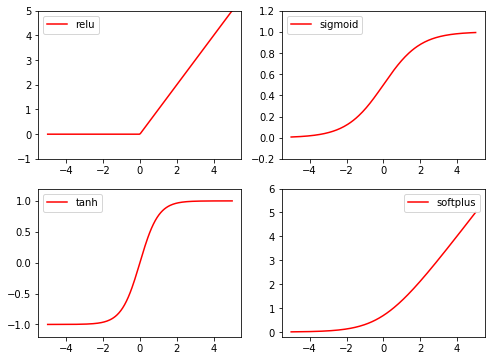

In [7]:
#h画出图形
import matplotlib.pyplot as plt

plt.figure(1,figsize=(8,6))
plt.subplot(221)
plt.plot(x_np,y_relu,c='red',label='relu')
plt.ylim((-1,5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')
 
plt.subplot(223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')
 
plt.subplot(224)
plt.plot(x_np, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')
 
plt.show()